In [1]:
# AI Data Insights Assistant
## Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
from sklearn.datasets import load_diabetes

data = load_diabetes(as_frame=True)
df = data.frame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [5]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.268604e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [6]:
## Initial Data Overview

### At first glance, the dataset presents a well-preprocessed structure, with all input features already standardized and centered around zero. This indicates that the data was previously normalized, which is beneficial for most machine learning algorithms and removes the need for additional feature scaling at this stage.

### The target variable, which represents disease progression, shows a wide range of values and a relatively high variance. This suggests a complex regression problem, where simple linear relationships may not be sufficient to fully capture the underlying patterns.

### Overall, the dataset appears suitable for exploratory analysis and predictive modeling. The combination of standardized features and a variable target highlights the importance of selecting appropriate models and evaluation metrics in the next steps of the project.

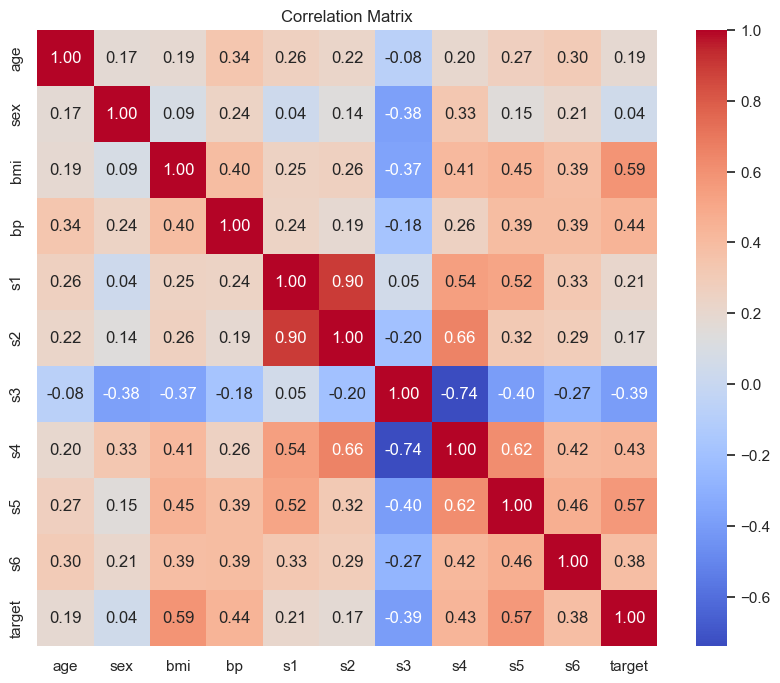

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [8]:
## Correlation Analysis

### The correlation matrix highlights that only a subset of features shows a moderate linear relationship with the target variable. In particular, variables such as BMI, blood pressure, and S5 present stronger correlations compared to other features.

### However, the overall correlation values are not extremely high, suggesting that linear relationships alone may not fully explain disease progression. This reinforces the need for more flexible machine learning models capable of capturing non-linear patterns and interactions between variables.

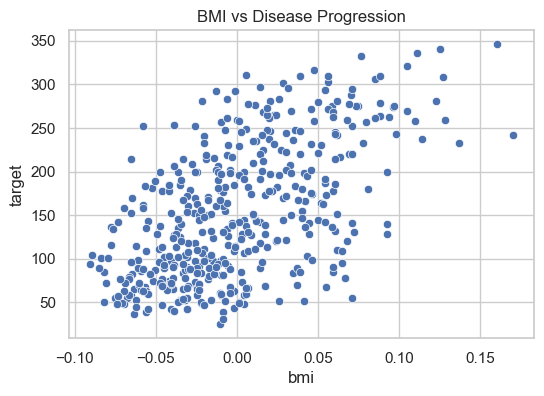

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="bmi", y="target", data=df)
plt.title("BMI vs Disease Progression")
plt.show()

In [10]:
## Feature vs Target Analysis

### The scatter plot between BMI and the target variable reveals a positive trend, although with significant dispersion. This indicates that while BMI contributes to disease progression, it is not a determining factor on its own.

### The observed spread suggests the presence of additional influencing variables and possible non-linear relationships, reinforcing the need for multivariate and non-linear modeling approaches.

In [11]:
# 2. Initial Modeling

#### Based on the exploratory data analysis conducted on Day 1, it was possible to identify relevant relationships between some explanatory variables and the target variable. In this stage, the modeling process begins with the objective of building a simple predictive model to serve as a baseline.

In [12]:
X = df.drop(columns=["target"])
y = df["target"]

X.shape, y.shape

((442, 10), (442,))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((353, 10), (89, 10))

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

rmse, r2

(53.85344583676592, 0.4526027629719196)

In [16]:
## Baseline Model Evaluation

### A linear regression model was used as a baseline approach to evaluate the initial predictive performance of the dataset. The obtained results include the Root Mean Squared Error (RMSE), which represents the average prediction error, as well as the R² score, which expresses the proportion of the variability in the target variable explained by the model.

#### Although simple, this model provides an important reference point for future comparisons with more complex and robust modeling techniques.

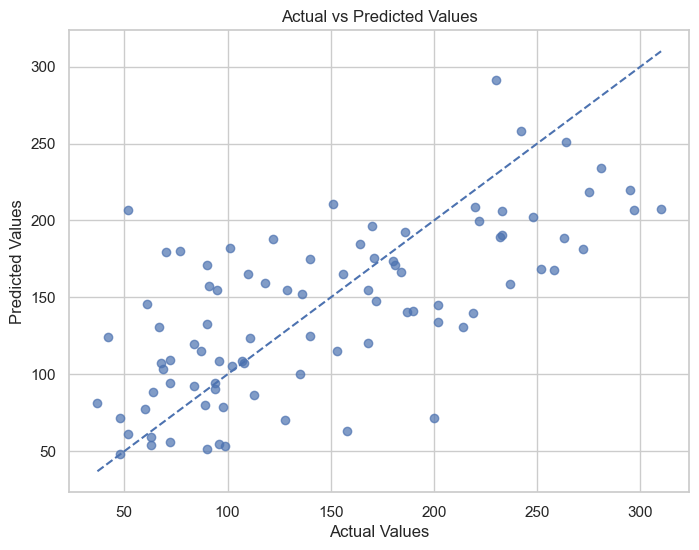

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

In [18]:
## Baseline Model Visualization Analysis

### The Actual vs Predicted scatter plot demonstrates a clear positive relationship between the true target values and the model predictions, indicating that the linear regression model captures a portion of the underlying trend present in the data.

### Nevertheless, the noticeable dispersion of points around the ideal prediction line highlights significant prediction errors, particularly for higher target values. This observation is consistent with the obtained RMSE and R² metrics, suggesting that the linear assumption limits the model’s ability to fully explain the variability of the target variable.

### Overall, these results emphasize the necessity of adopting more expressive models capable of capturing non-linear patterns and complex interactions between features, which will be addressed in the next stage of the modeling process.


In [19]:
# 3. Advanced Modeling - Random Forest Regressor

In [20]:
### After establishing a linear regression model as a baseline, a more expressive model is now introduced to capture non-linear relationships and interactions between features.

### The Random Forest Regressor is an ensemble learning method based on multiple decision trees. By aggregating predictions from many trees, it is capable of modeling complex patterns while reducing overfitting.

### This section evaluates whether the Random Forest model provides a measurable improvement over the baseline model.


In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [36]:
y_pred_rf = rf_model.predict(X_test)

In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf

(np.float64(54.332408273184846), 0.4428225673999313)

In [40]:
import pandas as pd

# Create DataFrame with importances
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
})

# Sort from most important to least important
feature_importance = feature_importance.sort_values(
    by='importance',
    ascending=False
)

feature_importance

,feature,importance
2,bmi,0.355469
8,s5,0.230957
3,bp,0.088408
9,s6,0.071329
0,age,0.058642
5,s2,0.057227
4,s1,0.052784
6,s3,0.051339
7,s4,0.024213
1,sex,0.009633


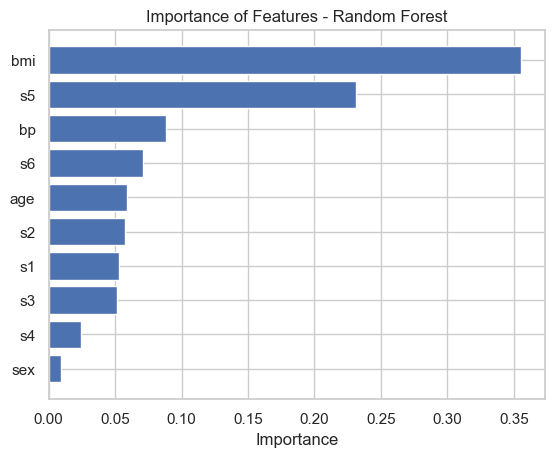

In [41]:
import matplotlib.pyplot as plt

plt.figure()
plt.barh(
    feature_importance['feature'],
    feature_importance['importance']
)
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Importance of Features - Random Forest')
plt.show()

In [ ]:
### The feature importance plot reveals a strong dominance of BMI, followed by s5, indicating that the Random Forest model relies primarily on metabolic-related variables to make predictions. Variables such as blood pressure and age present moderate importance, suggesting secondary contributions through non-linear interactions.

### On the other hand, features like sex and s4 show minimal influence on the model’s predictions. Overall, the results suggest that the predictive structure of the problem is concentrated in a small subset of features, reinforcing the need for further interpretability analysis using permutation-based methods.


In [ ]:
## 4. Permutation Feature Importance

In [46]:
from sklearn.inspection import permutation_importance
import pandas as pd

# Compute permutation importance
perm_importance = permutation_importance(
    rf_model,
    X_test,
    y_test,
    n_repeats=30,
    random_state=42,
    n_jobs=-1
)

# Create DataFrame
perm_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values(by='importance_mean', ascending=False)

perm_df


,feature,importance_mean,importance_std
8,s5,0.260658,0.054933
2,bmi,0.233816,0.069303
3,bp,0.019158,0.031395
1,sex,0.018284,0.005863
9,s6,0.016885,0.017276
0,age,0.006244,0.019766
7,s4,0.000629,0.008047
5,s2,-0.002858,0.012641
6,s3,-0.010119,0.011442
4,s1,-0.014309,0.013883


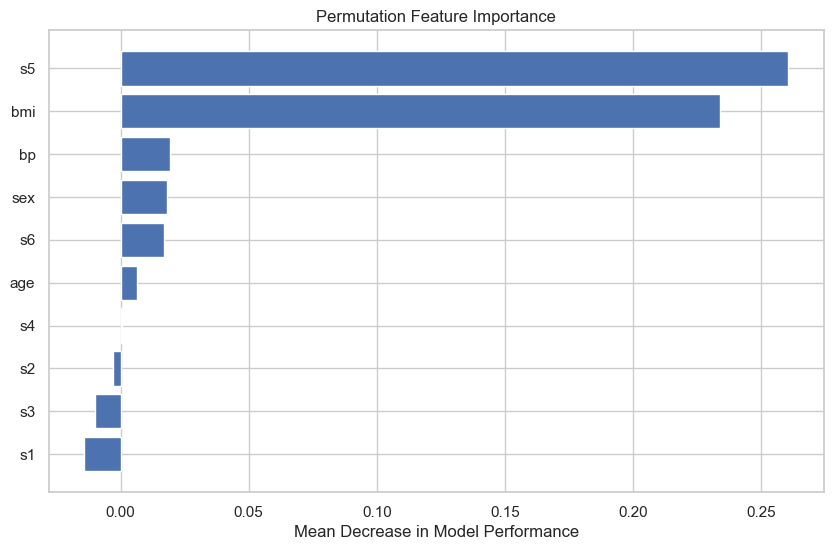

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(
    perm_df['feature'],
    perm_df['importance_mean']
)
plt.xlabel("Mean Decrease in Model Performance")
plt.title("Permutation Feature Importance")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
## Permutation Feature Importance Analysis

### The permutation importance analysis provides a more reliable estimation of feature relevance by measuring the impact of each variable on the model's predictive performance when its values are randomly shuffled.

### The results indicate that variables **s5** and **bmi** are the most influential features, as permuting them leads to a substantial decrease in model performance. This confirms their critical role in predicting the target variable and reinforces the patterns observed in previous modeling stages.

### Conversely, several features such as **s1**, **s2**, and **s3** exhibit near-zero or negative importance values. This behavior suggests that these variables do not contribute meaningfully to the model and may introduce noise rather than useful information.

### Compared to the internal feature importance derived from the Random Forest model, permutation importance offers a more faithful representation of each feature’s true predictive contribution. This comparison highlights the presence of redundant or weak predictors and suggests that feature selection techniques could further enhance model performance and interpretability.